# Cvičení


https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952


## Kosatce


In [11]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
)
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.model_selection import cross_val_score

In [12]:
data = pandas.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



Vyzkoušej rozhodovací strom na datové sadě o kostatcích ([IRIS.csv](IRIS.csv)). 


U datové sady nemusíš provádět žádné úpravy (OneHot encoding není potřeba, protože jsou tam pouze numerické hodnoty, a Scale není obecně u rozhodovacích stromů potřeba). 


In [13]:
X = data.drop(columns="species")
y = data["species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


Zkus vytvořit nízký strom, který má max. 4 patra. 


In [14]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


Strom si zobraz jako obrázek. Vypočti metriku `accuracy` pro tento strom.


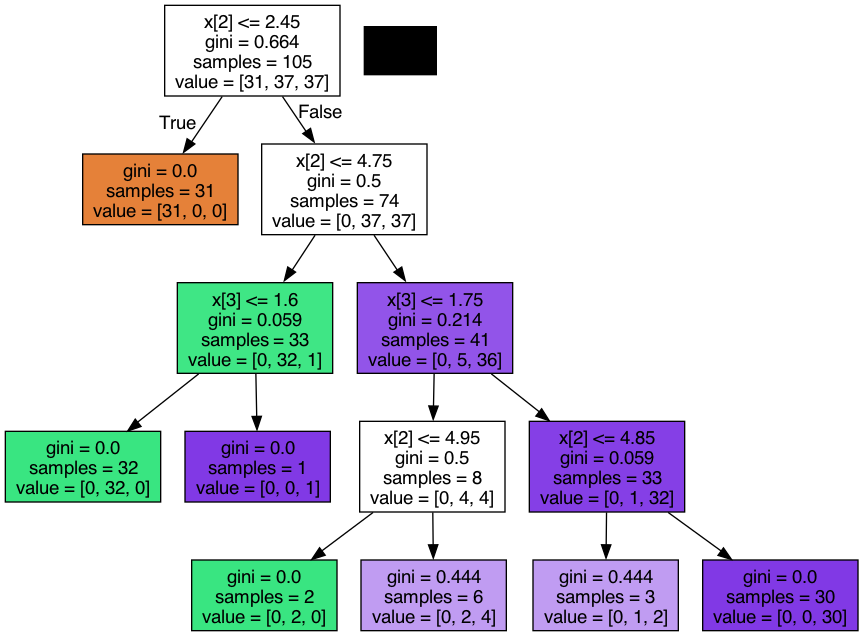

In [15]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [19]:
# Výpočet metriky přesnosti (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Přesnost (accuracy): {accuracy:.4f}")

Přesnost (accuracy): 1.0000


Zkus vytvořit strom se 3, 4 a 5 a patry a poté s minimální velikostí rozhodovacích vrcholů 30, 40, 50. 

Která varianta je nejlepší z pohledu `accuracy`?

In [17]:
# clf = DecisionTreeClassifier(max_depth=3, min_samples_split=30, random_state=42)


max_depth_values = [3, 4, 5]
min_samples_leaf_values = [30, 40, 50]

best_accuracy = 0.0
best_config = None

for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:
        config = {"max_depth": max_depth, "min_samples_leaf": min_samples_leaf}
        clf = DecisionTreeClassifier(random_state=42, **config)
        scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
        mean_accuracy = scores.mean()
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_config = config

print(f"Nejlepší konfigurace: {best_config} s přesností: {best_accuracy:.4f}")

Nejlepší konfigurace: {'max_depth': 3, 'min_samples_leaf': 40} s přesností: 0.6476


---- 

## BONUS


V další části zkus vyhledat optimální parametry rozhodovacího stromu pomocí `GridSearchCV`. 

In [18]:
model = DecisionTreeClassifier()
params = {"max_depth": [3, 4, 5], "min_samples_split": [30, 40, 50]}

clf = GridSearchCV(model, params, scoring="accuracy")
clf.fit(X, y)

print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 4, 'min_samples_split': 30}
0.9666666666666668
